In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
movie_titles=pd.read_csv('movies.csv')
print(movie_titles.head())
movie_ratings=pd.read_csv('ratings.csv')
print(movie_ratings.head())
print(movie_ratings.shape)

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
(100836, 4)


In [2]:
#deleting unwanted columns
movie_ratings.drop(['timestamp'],inplace=True,axis=1)
print(movie_ratings.head())
movie_titles.drop(['genres'],inplace=True,axis=1)
print(movie_titles.head())
#merging on 'movieId' column to operate on a single dataframe
merged_movie_df=pd.merge(movie_ratings,movie_titles,on='movieId')
print(merged_movie_df.head())

   userId  movieId  rating
0       1        1     4.0
1       1        3     4.0
2       1        6     4.0
3       1       47     5.0
4       1       50     5.0
   movieId                               title
0        1                    Toy Story (1995)
1        2                      Jumanji (1995)
2        3             Grumpier Old Men (1995)
3        4            Waiting to Exhale (1995)
4        5  Father of the Bride Part II (1995)
   userId  movieId  rating             title
0       1        1     4.0  Toy Story (1995)
1       5        1     4.0  Toy Story (1995)
2       7        1     4.5  Toy Story (1995)
3      15        1     2.5  Toy Story (1995)
4      17        1     4.5  Toy Story (1995)


In [3]:
#finding the mean ratings and count per movie
print(merged_movie_df.groupby('title')['rating'].mean().head())
print(merged_movie_df.groupby('title')['rating'].mean().sort_values(ascending=False).head())
print(merged_movie_df.groupby('title')['rating'].count().sort_values(ascending=False).head())

title
'71 (2014)                                 4.0
'Hellboy': The Seeds of Creation (2004)    4.0
'Round Midnight (1986)                     3.5
'Salem's Lot (2004)                        5.0
'Til There Was You (1997)                  4.0
Name: rating, dtype: float64
title
Gena the Crocodile (1969)              5.0
True Stories (1986)                    5.0
Cosmic Scrat-tastrophe (2015)          5.0
Love and Pigeons (1985)                5.0
Red Sorghum (Hong gao liang) (1987)    5.0
Name: rating, dtype: float64
title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: rating, dtype: int64


In [8]:
#highest rating and count df
rating_mean=pd.DataFrame(columns=['Rating Mean','Rating Count'])
#assigning values to each column
rating_mean['Rating Mean']=merged_movie_df.groupby('title')['rating'].mean()
rating_mean['Rating Count']=merged_movie_df.groupby('title')['rating'].count()
print(rating_mean.sort_values("Rating Mean",ascending=False).head())

                                     Rating Mean  Rating Count
title                                                         
Gena the Crocodile (1969)                    5.0             1
True Stories (1986)                          5.0             1
Cosmic Scrat-tastrophe (2015)                5.0             1
Love and Pigeons (1985)                      5.0             1
Red Sorghum (Hong gao liang) (1987)          5.0             1


<Axes: >

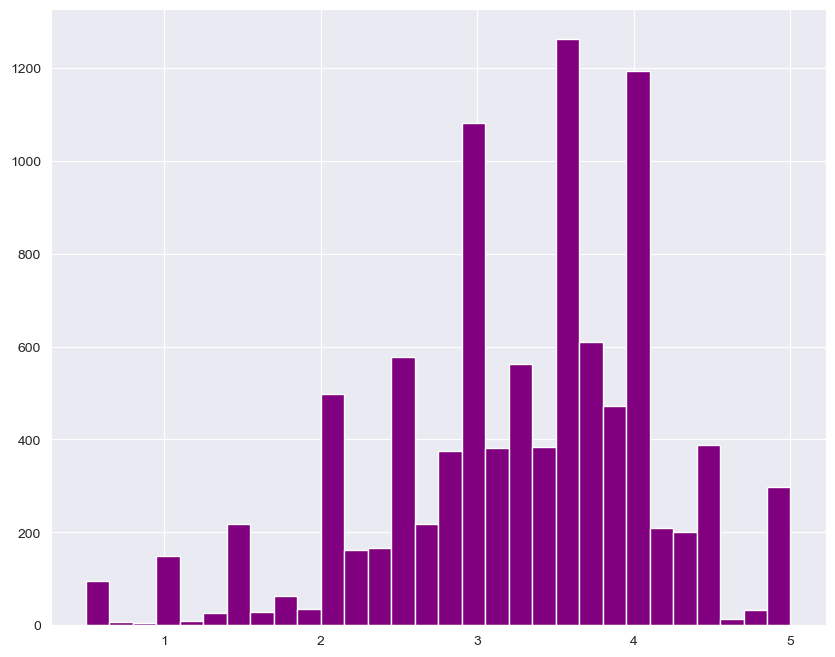

In [10]:
#graphing
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
rating_mean['Rating Mean'].hist(bins=30,color='purple')

<Axes: >

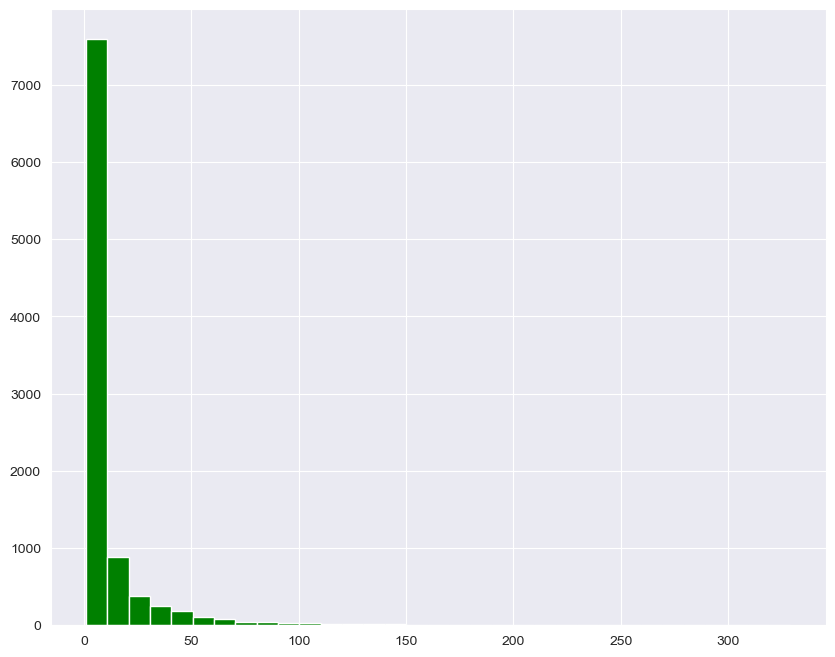

In [11]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
rating_mean['Rating Count'].hist(bins=33,color='green')

<Axes: xlabel='Rating Mean', ylabel='Rating Count'>

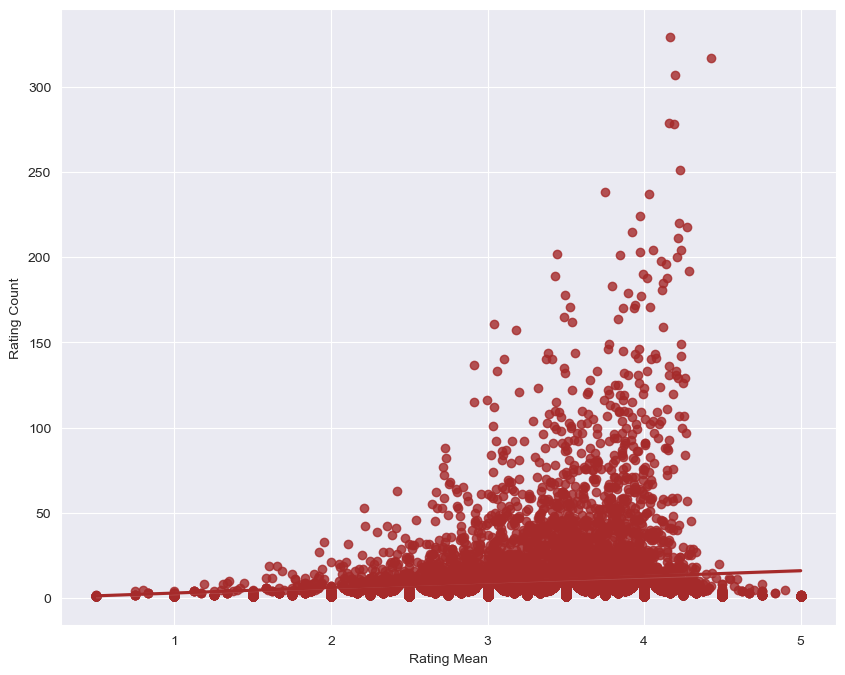

In [12]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.regplot(x="Rating Mean",y="Rating Count",data=rating_mean,color='brown')

In [14]:
#ITEM BASED
#creating matrix where correlations are to be stored
user_rating_matrix=merged_movie_df.pivot_table(index='userId',columns='title',values='rating')
print(user_rating_matrix)

title   '71 (2014)  'Hellboy': The Seeds of Creation (2004)  \
userId                                                        
1              NaN                                      NaN   
2              NaN                                      NaN   
3              NaN                                      NaN   
4              NaN                                      NaN   
5              NaN                                      NaN   
...            ...                                      ...   
606            NaN                                      NaN   
607            NaN                                      NaN   
608            NaN                                      NaN   
609            NaN                                      NaN   
610            4.0                                      NaN   

title   'Round Midnight (1986)  'Salem's Lot (2004)  \
userId                                                
1                          NaN                  NaN   
2              

In [15]:
print(user_rating_matrix.shape)

(610, 9719)


In [16]:
#single movie
movie_titles=pd.read_csv('movies.csv')
movie_titles.drop(['movieId'],inplace=True,axis=1)
print(movie_titles.head())

                                title  \
0                    Toy Story (1995)   
1                      Jumanji (1995)   
2             Grumpier Old Men (1995)   
3            Waiting to Exhale (1995)   
4  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [18]:
#giving user option to choose movie
movie_name=input("Enter Movie Name: ")
movie_rate=user_rating_matrix[movie_name]

Enter Movie Name: Jumanji (1995)


In [20]:
#finding coefficient of correlation to print the most appropriate recommendations
movie_corr=pd.DataFrame(user_rating_matrix.corrwith(movie_rate),columns=["corr"])
movie_corr=movie_corr.join(rating_mean["Rating Count"])
#droping NaN values
print(movie_corr.dropna(inplace=True))
print(movie_corr.head())

/Applications/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Applications/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


None
                                    corr  Rating Count
title                                                 
'burbs, The (1989)              0.120173            17
(500) Days of Summer (2009)     0.397966            42
*batteries not included (1987)  0.719636             7
10 Cent Pistol (2015)          -1.000000             2
10 Cloverfield Lane (2016)      1.000000            14


In [21]:
#Printing Movies where rate count is greater than 50
corr_50=movie_corr[movie_corr["Rating Count"]>50]
print(corr_50.sort_values("corr",ascending=False).head())

                                corr  Rating Count
title                                             
Jumanji (1995)              1.000000           110
Notting Hill (1999)         0.798372            56
Million Dollar Baby (2004)  0.716712            52
Others, The (2001)          0.698576            55
Donnie Brasco (1997)        0.687060            52


In [23]:
#multiple movies
#creating matrix 
all_corr=user_rating_matrix.corr(method='pearson',min_periods=50)
print(all_corr.head())

title                                    '71 (2014)  \
title                                                 
'71 (2014)                                      NaN   
'Hellboy': The Seeds of Creation (2004)         NaN   
'Round Midnight (1986)                          NaN   
'Salem's Lot (2004)                             NaN   
'Til There Was You (1997)                       NaN   

title                                    'Hellboy': The Seeds of Creation (2004)  \
title                                                                              
'71 (2014)                                                                   NaN   
'Hellboy': The Seeds of Creation (2004)                                      NaN   
'Round Midnight (1986)                                                       NaN   
'Salem's Lot (2004)                                                          NaN   
'Til There Was You (1997)                                                    NaN   

title                    

In [25]:
movie_data=[['Forrest Gump (1994)',4.0],['Fight Club (1999)',3.5],['Interstellar (2014)',
4.0]]

In [26]:
test_movies= pd.DataFrame(movie_data, columns=['Movie Name','Movie Rating'])
print(test_movies.head())

            Movie Name  Movie Rating
0  Forrest Gump (1994)           4.0
1    Fight Club (1999)           3.5
2  Interstellar (2014)           4.0


In [27]:
recommended_movies= pd.Series()
for i in range(0,2):
    movie= all_corr[test_movies['Movie Name'][i]].dropna()
#iteration
movie= movie.map(lambda movie_corr: movie_corr*test_movies["Movie Rating"][i])
#append recommended movies
recommended_movies= recommended_movies.append(movie)

/var/folders/z5/6c1wsnzn0fxcb5vcjbm7svg80000gn/T/ipykernel_30709/1482276500.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  recommended_movies= pd.Series()
/var/folders/z5/6c1wsnzn0fxcb5vcjbm7svg80000gn/T/ipykernel_30709/1482276500.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recommended_movies= recommended_movies.append(movie)


In [28]:
#print final result
recommended_movies.sort_values(inplace=True,ascending=False)
print(recommended_movies.head(10))

Fight Club (1999)                                                 3.500000
Lock, Stock & Two Smoking Barrels (1998)                          2.570366
Django Unchained (2012)                                           2.225161
Life Is Beautiful (La Vita è bella) (1997)                        2.203741
Pulp Fiction (1994)                                               1.902128
Seven (a.k.a. Se7en) (1995)                                       1.787457
Léon: The Professional (a.k.a. The Professional) (Léon) (1994)    1.691103
Memento (2000)                                                    1.684206
Slumdog Millionaire (2008)                                        1.630262
Reservoir Dogs (1992)                                             1.615044
dtype: float64
